# Notebook Inicial

## Seleccionar el problema de clasificación

Dado que estamos utilizando un dataset de caras de celebridades, las opciones para clasificar son diversas. Vamos a elegir un problema que sea relevante, desafiante y no trivial. Algunas opciones podrían ser:

	- 1.	Clasificación por género: Predecir si una cara pertenece a un hombre o a una mujer.

	- 2.	Clasificación por edad: Clasificar en rangos de edad, por ejemplo: niños, jóvenes, adultos, ancianos.

	- 3.	Clasificación por emoción: Clasificar las caras según emociones, como felicidad, tristeza, enfado, etc.
	
	- 4.	Clasificación por celebridad específica: Identificar a qué celebridad pertenece una cara entre un conjunto de opciones.

# 1 - Exploración inicial

In [2]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
from glob import glob

In [3]:
dataset_path = '../DATASETS/Dataset P2/Celebrity Faces Dataset'

In [4]:
categories = os.listdir(dataset_path)
print(f"Categorías disponibles: {categories}")

Categorías disponibles: ['Robert Downey Jr', 'Brad Pitt', '.DS_Store', 'Leonardo DiCaprio', 'Jennifer Lawrence', 'Tom Cruise', 'Hugh Jackman', 'Angelina Jolie', 'Johnny Depp', 'Tom Hanks', 'Denzel Washington', 'Kate Winslet', 'Scarlett Johansson', 'Will Smith', 'Natalie Portman', 'Nicole Kidman', 'Sandra Bullock', 'Megan Fox']


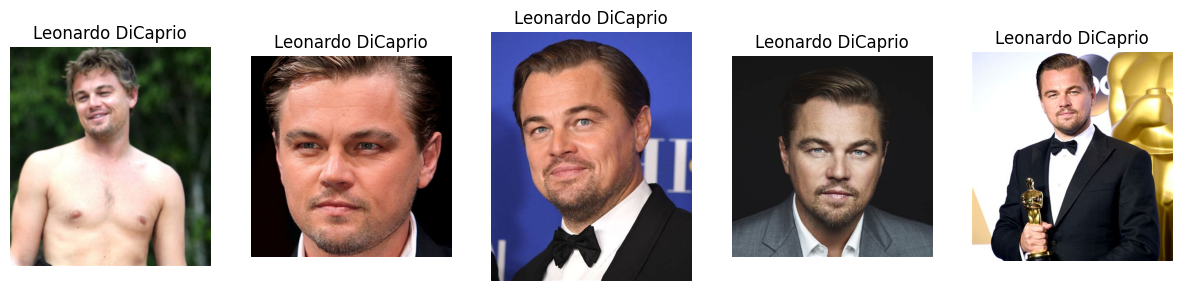

In [39]:
def display_images_from_category(category, n=5):
    images = glob(os.path.join(dataset_path, category, "*.jpg"))
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(images[:n]):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.title(category)
        plt.axis('off')
    plt.show()

category_to_inspect = categories[3]
display_images_from_category(category_to_inspect)

# 2 - Análisis de los datos

In [6]:
image_counts = {}
for category in categories:
    image_counts[category] = len(glob(os.path.join(dataset_path, category, "*.jpg")))

print("Número de imágenes por categoría:")
for category, count in image_counts.items():
    print(f"{category}: {count}")

Número de imágenes por categoría:
Robert Downey Jr: 100
Brad Pitt: 100
.DS_Store: 0
Leonardo DiCaprio: 100
Jennifer Lawrence: 100
Tom Cruise: 100
Hugh Jackman: 100
Angelina Jolie: 100
Johnny Depp: 100
Tom Hanks: 100
Denzel Washington: 100
Kate Winslet: 100
Scarlett Johansson: 200
Will Smith: 100
Natalie Portman: 100
Nicole Kidman: 100
Sandra Bullock: 100
Megan Fox: 100


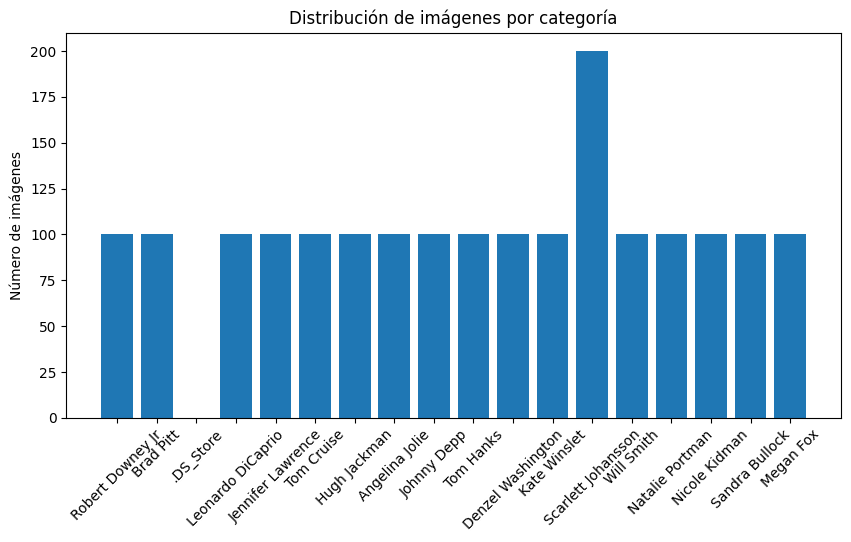

In [7]:
plt.figure(figsize=(10, 5))
plt.bar(image_counts.keys(), image_counts.values())
plt.xticks(rotation=45)
plt.title("Distribución de imágenes por categoría")
plt.ylabel("Número de imágenes")
plt.show()

In [9]:
def inspect_image_properties(category, n=5):
    images = glob(os.path.join(dataset_path, category, "*.jpg"))
    for img_path in images[:n]:
        img = cv2.imread(img_path)
        print(f"Resolución: {img.shape[:2]}, Formato: {img_path.split('.')[-1]}")

category_to_inspect = categories[0]
inspect_image_properties(category_to_inspect)

Resolución: (585, 474), Formato: jpg
Resolución: (395, 474), Formato: jpg
Resolución: (474, 474), Formato: jpg
Resolución: (435, 474), Formato: jpg
Resolución: (474, 474), Formato: jpg


# 3 - Preprocesamiento

In [10]:
from sklearn.model_selection import train_test_split
import numpy as np

# Parámetros
image_size = (128, 128)

# Cargar y preprocesar imágenes
def load_and_preprocess_images(dataset_path, categories, image_size):
    images, labels = [], []
    for idx, category in enumerate(categories):
        category_path = os.path.join(dataset_path, category)
        for img_path in glob(os.path.join(category_path, "*.jpg")):
            img = cv2.imread(img_path)
            img = cv2.resize(img, image_size)  # Redimensionar
            img = img / 255.0  # Normalizar
            images.append(img)
            labels.append(idx)  # Etiquetas numéricas
    return np.array(images), np.array(labels)

# Cargar datos
images, labels = load_and_preprocess_images(dataset_path, categories, image_size)

# Dividir en entrenamiento, validación y testing
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, stratify=labels, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, stratify=y_temp, random_state=42)

print(f"Partición de datos: \nEntrenamiento: {len(X_train)}, Validación: {len(X_val)}, Testing: {len(X_test)}")

Partición de datos: 
Entrenamiento: 1260, Validación: 361, Testing: 179


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuración de augmentación
datagen = ImageDataGenerator(
    rotation_range=30,         # Rotación aleatoria
    width_shift_range=0.2,     # Traslación horizontal
    height_shift_range=0.2,    # Traslación vertical
    shear_range=0.2,           # Deformaciones
    zoom_range=0.2,            # Zoom aleatorio
    horizontal_flip=True,      # Inversión horizontal
    brightness_range=[0.8, 1.2] # Cambio de brillo
)

# Aplicar augmentación a un lote
example_images = X_train[:5]
for img in example_images:
    img = img.reshape((1,) + img.shape)  # Requerido por datagen
    augmented_iter = datagen.flow(img, batch_size=1)
    plt.figure(figsize=(10, 5))
    for i in range(5):  # Mostrar 5 imágenes augmentadas
        plt.subplot(1, 5, i + 1)
        aug_img = next(augmented_iter)[0]
        plt.imshow(aug_img)
        plt.axis('off')
    plt.show()

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Visualizar distribución antes de augmentación
plt.figure(figsize=(10, 5))
plt.bar(categories, [sum(y_train == i) for i in range(len(categories))])
plt.title("Distribución de clases (antes de augmentación)")
plt.ylabel("Número de imágenes")
plt.xticks(rotation=45)
plt.show()

# Suponiendo augmentación balanceada
augmented_counts = [sum(y_train == i) * 5 for i in range(len(categories))]  # Factor de 5 augmentaciones por imagen

plt.figure(figsize=(10, 5))
plt.bar(categories, augmented_counts)
plt.title("Distribución de clases (después de augmentación)")
plt.ylabel("Número de imágenes")
plt.xticks(rotation=45)
plt.show()

# 4 - Diseño del Modelo

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Arquitectura del modelo
def build_cnn(input_shape, num_classes):
    model = Sequential()

    # Primera capa convolucional
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    # Segunda capa convolucional
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    # Tercera capa convolucional
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    # Capa densa
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Regularización
    model.add(Dense(num_classes, activation='softmax'))  # Capa de salida

    return model

# Parámetros
input_shape = (128, 128, 3)  # Tamaño de las imágenes
num_classes = len(categories)  # Número de categorías

# Crear el modelo
model = build_cnn(input_shape, num_classes)
model.summary()

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from sklearn.metrics import f1_score

# Implementar F1-score como callback
def f1_metric(y_true, y_pred):
    y_true = K.argmax(y_true, axis=-1)
    y_pred = K.argmax(y_pred, axis=-1)
    return tf.py_function(f1_score, (y_true, y_pred), tf.float32)

# Compilar el modelo
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Tasa de aprendizaje inicial
    loss='categorical_crossentropy',
    metrics=['accuracy', f1_metric]  # Incluye F1-score
)

# 5 - Entrenamiento del Modelo

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',  # Métrica a monitorear
    patience=5,          # Número de épocas sin mejora antes de detener
    restore_best_weights=True  # Restaurar los mejores pesos
)

# Guardar el mejor modelo
checkpoint = ModelCheckpoint(
    'best_model.h5',  # Nombre del archivo
    monitor='val_f1_metric',  # Métrica a monitorear
    save_best_only=True,  # Guardar solo si mejora
    mode='max'  # Queremos maximizar el F1-score
)

# Entrenamiento
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,  # Número inicial de épocas
    batch_size=32,  # Tamaño de lote
    callbacks=[early_stopping, checkpoint]
)

In [ ]:
import keras_tuner as kt

def build_model(hp):
    model = Sequential()

    # Número de capas convolucionales
    for i in range(hp.Int('conv_layers', 2, 4)):  # 2 a 4 capas
        model.add(Conv2D(
            filters=hp.Choice('filters', [32, 64, 128]),  # Filtros: 32, 64 o 128
            kernel_size=(3, 3),
            activation='relu',
            input_shape=input_shape if i == 0 else None
        ))
        model.add(MaxPooling2D((2, 2)))
        model.add(BatchNormalization())

    # Capas densas
    model.add(Flatten())
    model.add(Dense(
        units=hp.Int('dense_units', 64, 256, step=64),  # Unidades: 64 a 256
        activation='relu'
    ))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    # Compilar el modelo
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy', f1_metric]
    )
    return model

# Crear tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_f1_metric',
    max_epochs=30,
    factor=3,
    directory='tuner_dir',
    project_name='cnn_tuning'
)

# Búsqueda de hiperparámetros
tuner.search(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

# Obtener el mejor modelo
best_hps = tuner.get_best_hyperparameters(1)[0]
model = tuner.hypermodel.build(best_hps)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluación en validación
val_predictions = model.predict(X_val)
val_predictions = tf.argmax(val_predictions, axis=1).numpy()
y_val_true = tf.argmax(y_val, axis=1).numpy()

# Generar reporte de métricas
report = classification_report(y_val_true, val_predictions, target_names=categories)
print("Reporte de clasificación:\n", report)

# Matriz de confusión
conf_matrix = confusion_matrix(y_val_true, val_predictions)

# Visualizar matriz de confusión
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=categories, yticklabels=categories)
plt.title("Matriz de Confusión (Validación)")
plt.xlabel("Predicción")
plt.ylabel("Verdad")
plt.show()

# 6 - Evaluación y Resultados

In [ ]:
# Evaluación en testing
test_predictions = model.predict(X_test)
test_predictions = tf.argmax(test_predictions, axis=1).numpy()
y_test_true = tf.argmax(y_test, axis=1).numpy()

# Generar reporte de métricas
test_report = classification_report(y_test_true, test_predictions, target_names=categories)
print("Reporte de clasificación (Testing):\n", test_report)

# Matriz de confusión para testing
test_conf_matrix = confusion_matrix(y_test_true, test_predictions)

# Falsos positivos y negativos
false_positives = test_conf_matrix.sum(axis=0) - np.diag(test_conf_matrix)
false_negatives = test_conf_matrix.sum(axis=1) - np.diag(test_conf_matrix)

print("Falsos positivos por clase:", dict(zip(categories, false_positives)))
print("Falsos negativos por clase:", dict(zip(categories, false_negatives)))

In [ ]:
# Visualización de la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', xticklabels=categories, yticklabels=categories)
plt.title("Matriz de Confusión (Testing)")
plt.xlabel("Predicción")
plt.ylabel("Verdad")
plt.show()

In [ ]:
# Gráficas de pérdida y F1-score
plt.figure(figsize=(12, 5))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title("Pérdida por Época")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.legend()

# F1-score
plt.subplot(1, 2, 2)
if 'f1_metric' in history.history:
    plt.plot(history.history['f1_metric'], label='F1-Score de Entrenamiento')
    plt.plot(history.history['val_f1_metric'], label='F1-Score de Validación')
    plt.title("F1-Score por Época")
    plt.xlabel("Épocas")
    plt.ylabel("F1-Score")
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Guardar en formato TensorFlow SavedModel
model.save('cnn_saved_model')

# Guardar en formato HDF5
model.save('cnn_model.h5')

print("Modelo guardado exitosamente en los formatos 'SavedModel' y 'HDF5'.")